# 라이브러리

In [ ]:
from collections import namedtuple                                  #표준 라이브러리 모듈 
import warnings
warnings.filterwarnings(action='ignore')
import urllib
from urllib import parse
from urllib.request import urlopen , Request
from urllib.parse import urlencode, unquote, quote_plus
import json
from datetime import timedelta
import math
import io
import datetime as dt
import time
import sys
import glob
import csv

import numpy as np                                                  #서드 파티 모듈
import sympy as sp
from numpy import array as vector
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from IPython.display import Image
from IPython.display import HTML
from IPython.display import display
from IPython.display import YouTubeVideo
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from pandas import Series, DataFrame
import lxml
from datetime import datetime,timedelta
import xmltodict
import cv2
from pyproj import Proj, transform

- 파이썬 표준 라이브러리  
[파이썬문서](https://docs.python.org/ko/3/library/index.html)  
<br/>

- warnings   
[티스토리](https://rfriend.tistory.com/346)
<br/>

---

### <누적 확진자 - 시도별 API>

- 코로나 API    
[공공데이터포털](https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15043378)  

In [ ]:
t=time.strftime('%Y%m%d', time.localtime(time.time()))
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : '서비스키', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('startCreateDt') : '20200415', quote_plus('endCreateDt') : 't' })
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()

# xml -> dict -> json -> dict
rD = xmltodict.parse(response_body)   
rDJ = json.dumps(rD)
rDD = json.loads(rDJ)
w_data = rDD["response"]["body"]["items"]["item"]
df=DataFrame(w_data)
df.head(19)

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-08-13 09:43:02.987,12,5531,검역,隔離區,Lazaretto,18,5026,493,0,18,-,11504,2021년 08월 13일 00시,null
1,2021-08-13 09:43:02.987,1,1984,제주,济州,Jeju,44,1777,206,44,0,294.08,11503,2021년 08월 13일 00시,null
2,2021-08-13 09:43:02.986,23,8560,경남,庆南,Gyeongsangnam-do,125,7237,1300,122,3,256.27,11502,2021년 08월 13일 00시,null
3,2021-08-13 09:43:02.986,88,6110,경북,庆北,Gyeongsangbuk-do,82,5410,612,77,5,231.49,11501,2021년 08월 13일 00시,null
4,2021-08-13 09:43:02.985,18,2256,전남,全南,Jeollanam-do,18,2022,216,18,0,121.84,11500,2021년 08월 13일 00시,null
5,2021-08-13 09:43:02.985,60,3070,전북,全北,Jeollabuk-do,27,2714,296,25,2,170.17,11499,2021년 08월 13일 00시,null
6,2021-08-13 09:43:02.985,46,5777,충남,忠南,Chungcheongnam-do,72,4852,879,68,4,272.37,11498,2021년 08월 13일 00시,null
7,2021-08-13 09:43:02.985,71,4430,충북,忠北,Chungcheongbuk-do,52,3824,535,50,2,276.73,11497,2021년 08월 13일 00시,null
8,2021-08-13 09:43:02.984,57,4864,강원,江原,Gangwon-do,33,4441,366,33,0,315.26,11496,2021년 08월 13일 00시,null
9,2021-08-13 09:43:02.983,700,61904,경기,京畿,Gyeonggi-do,540,53907,7297,527,13,461.04,11495,2021년 08월 13일 00시,null


---

### <통계청 인구수>

- 21년 4,5,6월 성별 및 전체 시도별 인구 수   
[통계청](https://kosis.kr/visual/populationKorea/PopulationByNumber/PopulationByNumberMain.do?mb=N)  

In [ ]:
ingu= pd.read_csv(r"ingu.csv",encoding = 'cp949')
ingu.head()

,행정구역(시군구)별,2021. 04,2021. 04.1,2021. 04.2,2021. 05,2021. 05.1,2021. 05.2,2021. 06,2021. 06.1,2021. 06.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51702100,25784538,25917562,51683025,25775853,25907172,51672400,25770033,25902367
2,서울특별시,9588711,4661711,4927000,9575355,4654720,4920635,9565990,4649442,4916548
3,부산광역시,3369704,1650252,1719452,3367334,1648965,1718369,3364358,1647291,1717067
4,대구광역시,2406296,1186663,1219633,2402940,1184977,1217963,2397646,1182380,1215266


---

### <SIR 지역별>

- 매주 발행 TF보고서 -> 지역별 β , γ 값 확인 가능  
[NIMS](https://www.nims.re.kr/research/post/covid19_2) 

![bg](https://user-images.githubusercontent.com/46811558/149462862-d00a3b37-3854-4ea4-bac1-3e2f9db02903.JPG) 

- 고려하지 않은 일반적인 파라미터 : β =2 , γ=0.1 
- SIR 모델     
![모델](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsRkG82N1PmjKm77cKZ6_y-Y1BKBgA1Ul69Q&usqp=CAU)

### 1-1. 서울,인천 시·도 별  SIR모델 (2 X 2 )

### $$ \frac{dSs}{dt} = -β Ss Is + a Ss - b Si $$
### $$ \frac{dSi}{dt} = -β Si Ii - a Ss + b Si $$
### $$ \frac{dIs}{dt} = β Ss Is -γIs+ a Is - b Ii $$
### $$ \frac{dIi}{dt} = β Si Ii -γIi- a Is + b Ii $$
### $$ \frac{dRs}{dt} = γIs + a Rs - b Ri $$
### $$ \frac{dRi}{dt} = γIi - a Rs + b Ri $$

- 인구수
  - 서울 : 인천 = 960 : 300 ≈ 3: 1 
 
- 누적 확진자 수
  - 서울 : 인천 = 68000 : 10000 ≈ 7: 1

In [ ]:
#매개 변수
beta=2
gamma=0.1

a=0.1
b=3 * a

sir_init=[0.69,0.01,0.0,0.29,0.01,0.0]
tspan=[0,20]

#SIR 함수
def sir(beta,gamma):
    def f(t,x):
        SS ,IS , RS, SI, II ,RI = x
        return vector([ (-beta * SS * IS - a * SS + b * SI) , (beta * SS * IS - gamma * IS - a * IS + b * II) , (gamma * IS - a * RS + b * RI), (-beta * SI * II + a * SS - b * SI) , (beta * SI * II - gamma * II + a * IS - b * II) , (gamma * II + a * RS - b * RI) ])
    return f

#sol
sol=solve_ivp(sir(beta,gamma),tspan,sir_init)

#plot(grid)
def plot_sir(sol, title="SIR Model", ax=None):         
    if ax is None:
        fig, ax = plt.subplots()
    # ".-" linespec은 t_eval이나 h 확인을 위해
    ax.plot(sol.t, sol.y.T, ".-")#label=["Susceptible", "Infected", "Recovered"])
    ax.set(
        xlabel="Time",
        ylabel="Population (normalized)",
        title=title,
    )
    #ax.legend()
    ax.grid()                                 #격자
    return ax

#plot(None grid, label)
def plot(sol,title="SIR Model"):
    plt.plot(sol.t,sol.y[0],label="SS")
    plt.plot(sol.t,sol.y[1],label="IS")
    plt.plot(sol.t,sol.y[2],label="RS")
    plt.plot(sol.t,sol.y[3],label="SI")
    plt.plot(sol.t,sol.y[4],label="II")
    plt.plot(sol.t,sol.y[5],label="RI")
    plt.legend()
    plt.show()

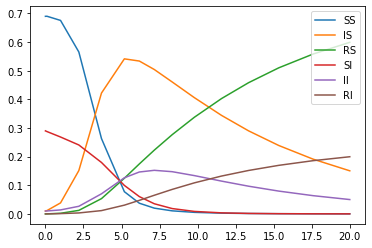

In [ ]:
plot(sol)
pass

### 1-2. 유동인구 파라미터 a,b 의 값의 변화에 따른 확진자의 Peak 
- 인천의 확진자수는 돌릴수록 계속증가, 파라미터 a도 마찬가지로 최대치에 근사함.

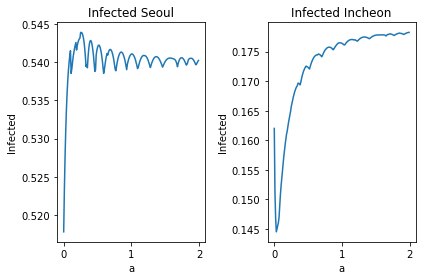

서울시 확진자의 최대치는 5221366명 이며, 최대가 되는 유동인구 파라미터 a는 0.26입니다.
인천시 확진자의 최대치는 516948명 이며, 최대가 되는 유동인구 파라미터 a는 1.99입니다.


In [ ]:
max_is=[]
max_ii=[]
k=[]

for i in range(0,200):
    a=i/100
    b=3*i/100
    sol=solve_ivp(sir(beta,gamma),tspan,sir_init)
    max_is.append(max(sol.y[1]))
    max_ii.append(max(sol.y[4]))
    k.append(i/100)
    
plt.subplot(1,2,1)
plt.plot(k,max_is,label="IS")
plt.title("Infected Seoul")
plt.xlabel("a")
plt.ylabel("Infected")

plt.subplot(1,2,2)
plt.plot(k,max_ii,label="II")
plt.title("Infected Incheon")
plt.xlabel("a")
plt.ylabel("Infected")

plt.tight_layout()
plt.show()

print(f"서울시 확진자의 최대치는 {round(max(max_is)*9600000)}명 이며, 최대가 되는 유동인구 파라미터 a는 {1/100*np.argmax(max_is)}입니다.")
print(f"인천시 확진자의 최대치는 {round(max(max_ii)*2900000)}명 이며, 최대가 되는 유동인구 파라미터 a는 {1/100*np.argmax(max_ii)}입니다.")

### 1-3. 서울,인천의 베타,감마값과 인구수 대비 확진자 고려하여 초기값을 준 모델 

- 감마,베타 값에 맞는 초기값(7/23 기준)
- DEF_CNT : 누적 확진자
- ISOL_CLEAR_CNT : 격리 해제 수
- DEATH_CNT : 사망자
- 서울 I(DEF_CNT) : 60000 , R(ISOL_CLEAR_CNT+DEATH_CNT) : 50000
- 인천 I(DEF_CNT) : 8000 ,  R(ISOL_CLEAR_CNT+DEATH_CNT) : 7000

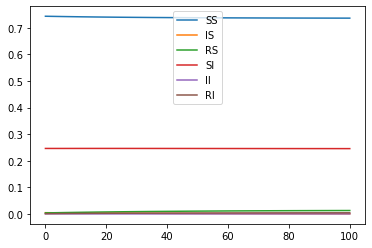

In [ ]:
beta_seoul=0.047
gamma_seoul=0.047
beta_incheon=0.4522
gamma_incheon=0.366

sir_init=[160,1,0.833,53,0.14,0.14]
sir_init=list(map(lambda x: x/sum(sir_init),sir_init))
tspan=[0,100]

a=0.01
b=3 * a

def sir_diff(beta_s,gamma_s,beta_i,gamma_i):
    def f(t,x):
        SS ,IS , RS, SI, II ,RI = x
        return vector([ (-beta_s * SS * IS - a * SS + b * SI) , (beta_s * SS * IS - gamma_s * IS - a * IS + b * II) , (gamma_s * IS - a * RS + b * RI), (-beta_i * SI * II + a * SS - b * SI) , (beta_i * SI * II - gamma_i * II + a * IS - b * II) , (gamma_i * II + a * RS - b * RI) ])
    return f

sol_diff=solve_ivp(sir_diff(beta_seoul,gamma_seoul,beta_incheon,gamma_incheon),tspan,sir_init)

plot(sol_diff)

---

### 2. 서울,경기,인천 시·도 별  SIR모델 (3 X 3 )

||누적확진자|인구수|
|------|---|---|
|경기|55000|13000000|
|인천|8800|30000000|
|서울|63000|96000000|

---

![33](https://user-images.githubusercontent.com/46811558/149462984-fd9cb007-cae6-445d-a049-4a3563a5eb05.png)

## 밑의 pop, coef matrix

$$\left[\begin{array}{rrr} 
0&39&39\\
130&0&130\\
30&30&
\end{array}\right]$$

$$\left[\begin{array}{rrr} 
-78&130&30\\
39&-260&30\\
39&130&-60
\end{array}\right]$$

In [ ]:
#파라미터
beta=2
gamma=0.1
sir_init=[0.37,0.2,0.4,0.01,0.01,0.01,0.0,0.0,0.0]
tspan=[0,100]

# 인구수 행렬
A=np.array([[0,39,39],[130,0,130],[30,30,0]])
coef_matrix=np.array([[-78,130,30],[39,-260,30],[39,130,-60]])

#서울,인천,경기 SIR모델
def sir_matrix(beta,gamma):
    def f(t,x):
        SS, SI , SG ,IS ,II ,IG ,RS, RI ,RG =x
        return np.array([[-beta * np.array([SS*IS,SI*II,SG*IG])+ coef_matrix @ np.array([SS,SI,SG])],
                                [beta * np.array ([SS*IS,SI*II,SG*IG]) - gamma *  np.array([IS,II,IG]) +coef_matrix @ np.array([IS,II,IG])],
                                [gamma * np.array([IS,II,IG])+coef_matrix @ np.array([RS,RI,RG])]]).flatten()
    return f

#솔루션
sol=solve_ivp(sir_matrix(beta,gamma),tspan,sir_init)

#plot(label)
def plot(sol,title="SIR Model"):
    plt.plot(sol.t,sol.y[0],label="SS")
    plt.plot(sol.t,sol.y[1],label="SI")
    plt.plot(sol.t,sol.y[2],label="SG")
    plt.plot(sol.t,sol.y[3],label="IS")
    plt.plot(sol.t,sol.y[4],label="II")
    plt.plot(sol.t,sol.y[5],label="IG")
    plt.plot(sol.t,sol.y[6],label="RS")
    plt.plot(sol.t,sol.y[7],label="RI")
    plt.plot(sol.t,sol.y[8],label="RG")
    plt.legend()
    plt.show()

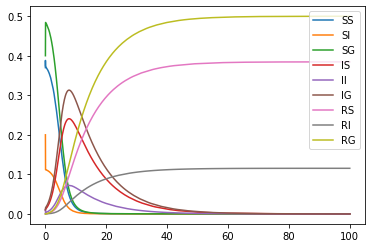

In [ ]:
plot(sol)

---

### 3. 전국 시·도 별  SIR모델 (17 X 17 )
#### 인구수 CSV파일

In [ ]:
ingu= pd.read_csv(r"ingu.csv",encoding = 'cp949')
ingu.head()
pop=ingu.loc[:,["행정구역(시군구)별","2021. 06"]]
pop.head()

,행정구역(시군구)별,2021. 06
0,행정구역(시군구)별,총인구수 (명)
1,전국,51672400
2,서울특별시,9565990
3,부산광역시,3364358
4,대구광역시,2397646


#### csv파일 기준 인구비율

In [ ]:
pop_ratio=pd.DataFrame({"sido":["서울","부산","대구","인천","광주","대전","울산","세종","경기","강원","충북","충남","전북","전남","경북","경남","제주"],
                       "pop":[957,336,234,294,144,146,113,36.3,1350,154,160,212,179,184,263,333,67.5]})
pop_ratio["inverse"]=pop_ratio["pop"].apply(lambda x:1/x)
pop_ratio["ratio"]=pop_ratio["pop"].apply(lambda x:x/sum(pop_ratio["pop"]))
pop_ratio.head()

,sido,pop,inverse,ratio
0,서울,957.0,0.001045,0.185365
1,부산,336.0,0.002976,0.065081
2,대구,234.0,0.004274,0.045324
3,인천,294.0,0.003401,0.056946
4,광주,144.0,0.006944,0.027892


#### 인구비율 pop_matrix , 계수비율 coef_matrix

In [ ]:
# 인구 비율 행렬
pop_matrix=np.zeros(shape=(17,17))

for i in range(len(pop_matrix)):
    for j in range(len(pop_matrix)):
        pop_matrix[i][j]=pop_ratio["inverse"][i]
for i in range(len(pop_matrix)):
        pop_matrix[i][i]=0  
        
#계수 행렬
coef_matrix=pop_matrix

for i in range(len(coef_matrix)):
     coef_matrix[i][i]=-sum(coef_matrix[i])
        
coef_matrix=np.transpose(coef_matrix)
coef_matrix

array([[-0.01671891,  0.00297619,  0.0042735 ,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493, -0.04761905,  0.0042735 ,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493,  0.00297619, -0.06837607,  0.00340136,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  ,  0.01481481],
       [ 0.00104493,  0.00297619,  0.0042735 , -0.05442177,  0.00694444,
         0.00684932,  0.00884956,  0.02754821,  0.00074074,  0.00649351,
         0.00625   ,  0.00471698,  0.00558659,  0.00543478,  0.00380228,
         0.003003  

#### 시도별 인구비율

In [ ]:
is_gyeomyeok=df["gubun"]!="검역"
is_total=df["gubun"]!="합계" 
df=df[is_gyeomyeok&is_total]
df=df[:17][:]
df=pd.concat([df["defCnt"],df["gubun"],df["gubunEn"]],axis=1)
df=df.rename(columns={"gubun":"sido"})
pop_ratio=pd.merge(df,pop_ratio,on="sido",how="outer")
pop_ratio["defCnt"]=pop_ratio["defCnt"].astype(int)
pop_ratio["defCnt_ratio"]=pop_ratio["defCnt"].apply(lambda x:x/sum(pop_ratio["defCnt"]))
pop_ratio["ratio_26"]=pop_ratio["ratio"].apply(lambda x:x*26)
pop_ratio.head()

,defCnt,sido,gubunEn,pop,inverse,ratio,defCnt_ratio,ratio_26
0,1984,제주,Jeju,67.5,0.014815,0.013074,0.009243,0.339932
1,8560,경남,Gyeongsangnam-do,333.0,0.003003,0.064500,0.039879,1.676997
2,6110,경북,Gyeongsangbuk-do,263.0,0.003802,0.050941,0.028465,1.324475
3,2256,전남,Jeollanam-do,184.0,0.005435,0.035640,0.010510,0.926629
4,3070,전북,Jeollabuk-do,179.0,0.005587,0.034671,0.014302,0.901449


---
## <1> pop
![pop](https://user-images.githubusercontent.com/46811558/149463113-215834dd-a3ec-484a-8f09-e498b8cb6ffc.JPG)

## <2> pop_inverse(ratio)
![reverse](https://user-images.githubusercontent.com/46811558/149463116-7803de53-b2e2-4461-8334-09fe6ef0e9ef.JPG)

#### $ pop= \frac{1}{a_n} $  
#### $ inverse= a_n $

## <3> pop_matrix


|      	| 제주 	| 경남 	| . 	| . 	| 부산 	| 서울 	|
|:----:	|:----:	|:----:	|:-:	|:-:	|:----:	|:----:	|
| 제주 	|   0  	|  a <sub>1 </sub> 	| . 	| . 	|   .  	|  a <sub>1 </sub> 	|
| 경남 	|  a <sub>2 </sub> 	|   0  	| . 	| . 	|   .  	|  a <sub>2 </sub> 	|
|   .  	|      	|      	| 0 	|   	|      	|      	|
|   .  	|      	|      	|   	| 0 	|      	|      	|
| 부산 	| a <sub>16 </sub> 	|   .  	| . 	| . 	|   0  	| a <sub>16 </sub>	|
| 서울 	| a <sub>17 </sub> 	|   .  	| . 	| . 	|a <sub>17 </sub> 	|   0  	|

## <4> coef_matrix

$$\left[\begin{array}{rrr} 
-\sum_{i=1}^{16} a_n&a_1&a_2&.&.&a_{16}\\
a_{17}&-\sum_{i=17}^{32} a_n&a_{18}&.&.&a_{32}\\
.&.&.&.&.&.\\
.&.&.&.&.&.\\
a_{225}&.&.&.&-\sum_{i=225}^{240} a_n&a_{240}\\
a_{241}&.&.&.&a_{256}&-\sum_{i=241}^{256} a_n\\
\end{array}\right]$$

$ a_{1}= a_{2} = . . . . .  . . . . . =a_{16} $    
.  
.  
.  
.  
.  

$ a_{241}= a_{242} = . . . . .  . . . . . =a_{256} $

## <5> coef_matrix.T
$$\left[\begin{array}{rrr} 
-\sum_{i=1}^{16} a_n&a_{17}&.&.&a_{225}&a_{241}\\
a_{1}&-\sum_{i=17}^{32} a_n&.&.&.&a_{242}\\
a_{2}&a_{18}&.&.&.&.\\
.&.&.&.&.&.\\
.&.&.&.&-\sum_{i=225}^{240} a_n&a_{256}\\
a_{16}&a_{32}&.&.&a_{240}&-\sum_{i=241}^{256} a_n\\
\end{array}\right]$$

## <6> SIR_sido

$ \frac{dS}{dt}= \left[\begin{array}{rrr} S_1\\.\\.\\.\\S_{17}\\\end{array}\right] = -β\left[\begin{array}{rrr} S_1I_1\\.\\.\\.\\S_{17}I_{17}\\\end{array}\right] + \left[\begin{array}{rrr} 
&&&&\\
&&&&\\
&&coef\_matrix.T&&\\
&&&&\\
&&&&\\
\end{array}\right]\left[\begin{array}{rrr} S_1\\.\\.\\.\\S_{17}\\\end{array}\right]$

$ \frac{dI}{dt}= \left[\begin{array}{rrr} I_1\\.\\.\\.\\I_{17}\\\end{array}\right] = β\left[\begin{array}{rrr} S_1I_1\\.\\.\\.\\S_{17}I_{17}\\\end{array}\right] -γ\left[\begin{array}{rrr} I_1\\.\\.\\.\\I_{17}\\\end{array}\right] +\left[\begin{array}{rrr} 
&&&&\\
&&&&\\
&&coef\_matrix.T&&\\
&&&&\\
&&&&\\
\end{array}\right]\left[\begin{array}{rrr} I_1\\.\\.\\.\\I_{17}\\\end{array}\right]$

$ \frac{dR}{dt}= \left[\begin{array}{rrr} R_1\\.\\.\\.\\R_{!7}\\\end{array}\right] =γ\left[\begin{array}{rrr} I_1\\.\\.\\.\\I_{17}\\\end{array}\right] +\left[\begin{array}{rrr} 
&&&&\\
&&&&\\
&&coef\_matrix.T&&\\
&&&&\\
&&&&\\
\end{array}\right]\left[\begin{array}{rrr} R_1\\.\\.\\.\\R_{!7}\\\end{array}\right]$

#### 초기값 기준 :
- 총합 1 (Normalized)
- 인구수 :5200 만 , 확진자 : 20만 -> 26:1
- R : 0

In [ ]:
#SIR 변수
N_SIR_COMPARTMENT = 3
SIR_LABELS = ["S", "I", "R"]
n_sido=17
sido_names=pop_ratio["gubunEn"]

#매개변수
tspan=(0,30)

#초기값
sir_init_s=pop_ratio["ratio_26"].tolist() 
sir_init_i=pop_ratio["defCnt_ratio"].tolist()
sir_init_r=[0] * 17
sir_init=(np.column_stack((sir_init_s,sir_init_i,sir_init_r))).flatten()
sir_init=list(map(lambda x: x/sum(sir_init),sir_init))

## 초기값 조정 위해 경기, 서울만 0.01
# sir_init_s=(pop_ratio["ratio_26"]/pop_ratio["ratio_26"].sum()).tolist() 
# sir_init_i=[0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0.01]
# sir_init_r=[0] * 17
# sir_init=(np.column_stack((sir_init_s,sir_init_i,sir_init_r))).flatten()
# sir_init=list(map(lambda x: x/sum(sir_init),sir_init))

#시도별 SIR모델
def sir_sido(t, y,c=1,beta=2, gamma=0.1):
    y = y.reshape((-1, N_SIR_COMPARTMENT))
    S, I, R = y.T 

    dsdt = -beta * S * I
    didt = beta * S * I - gamma * I
    drdt = gamma * I
    
    res = (np.column_stack((dsdt, didt, drdt)) + c * coef_matrix @ y).flatten()

    return res

#sol
sol=solve_ivp(sir_sido,tspan,sir_init,dense_output=True)
t=np.linspace(*tspan,200)
y=sol.sol(t)
sol_reshape=y.reshape((n_sido, N_SIR_COMPARTMENT, -1))

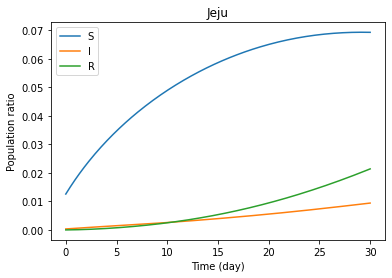

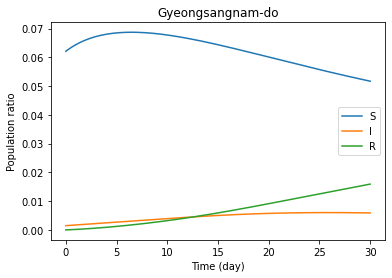

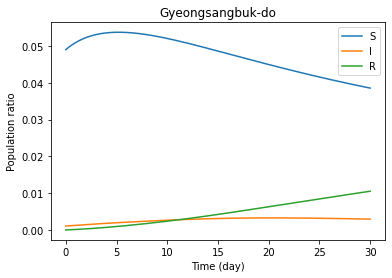

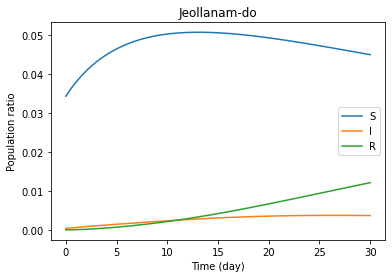

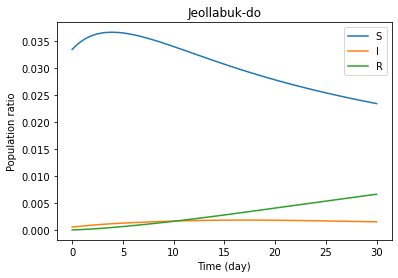

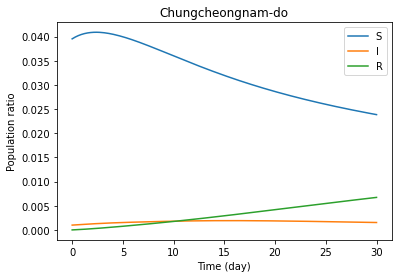

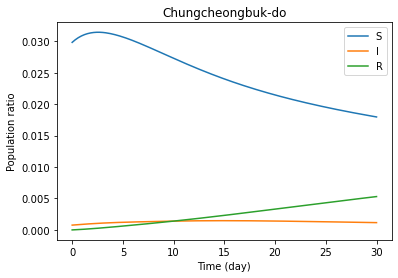

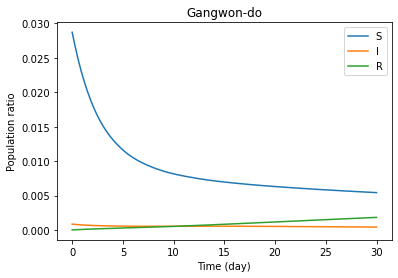

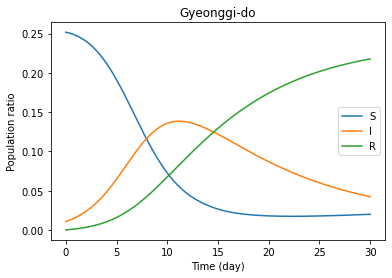

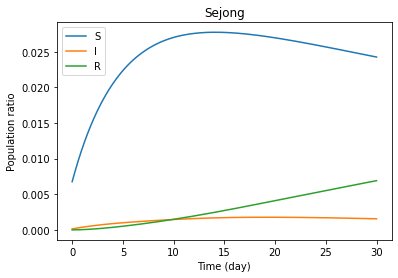

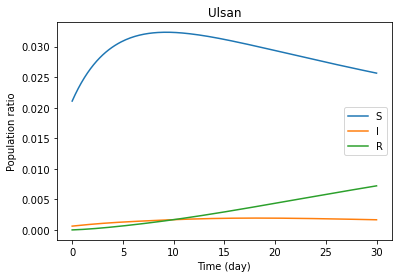

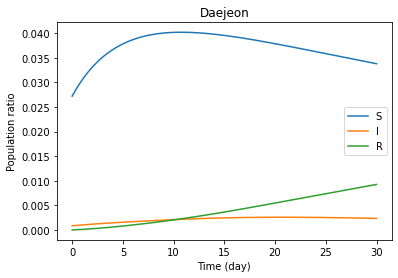

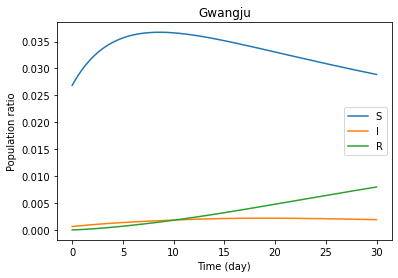

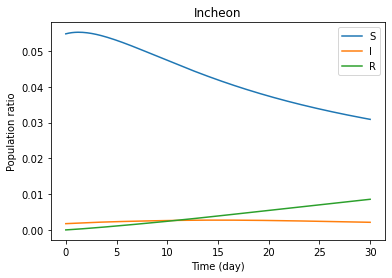

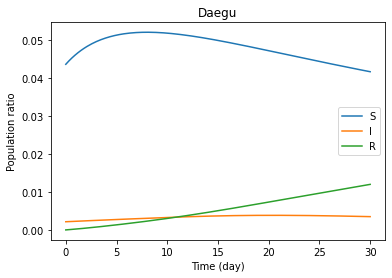

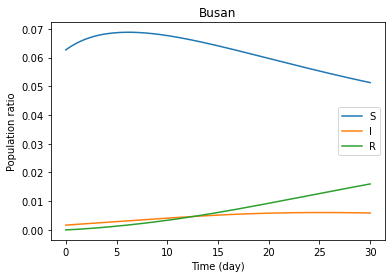

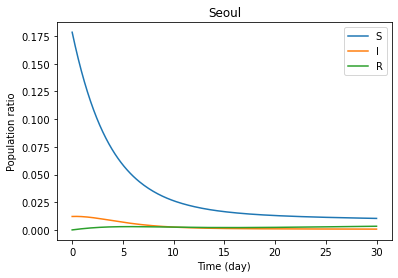

In [ ]:
for sido_name, y_sido in zip(sido_names,sol_reshape):
    fig , ax =plt.subplots()
    ax.plot(t, y_sido[0], label="S")
    ax.plot(t, y_sido[1], label="I")
    ax.plot(t, y_sido[2], label="R")
    ax.legend()
    ax.set(
        title=sido_name,
        xlabel="Time (day)",
        ylabel="Population ratio",
    )

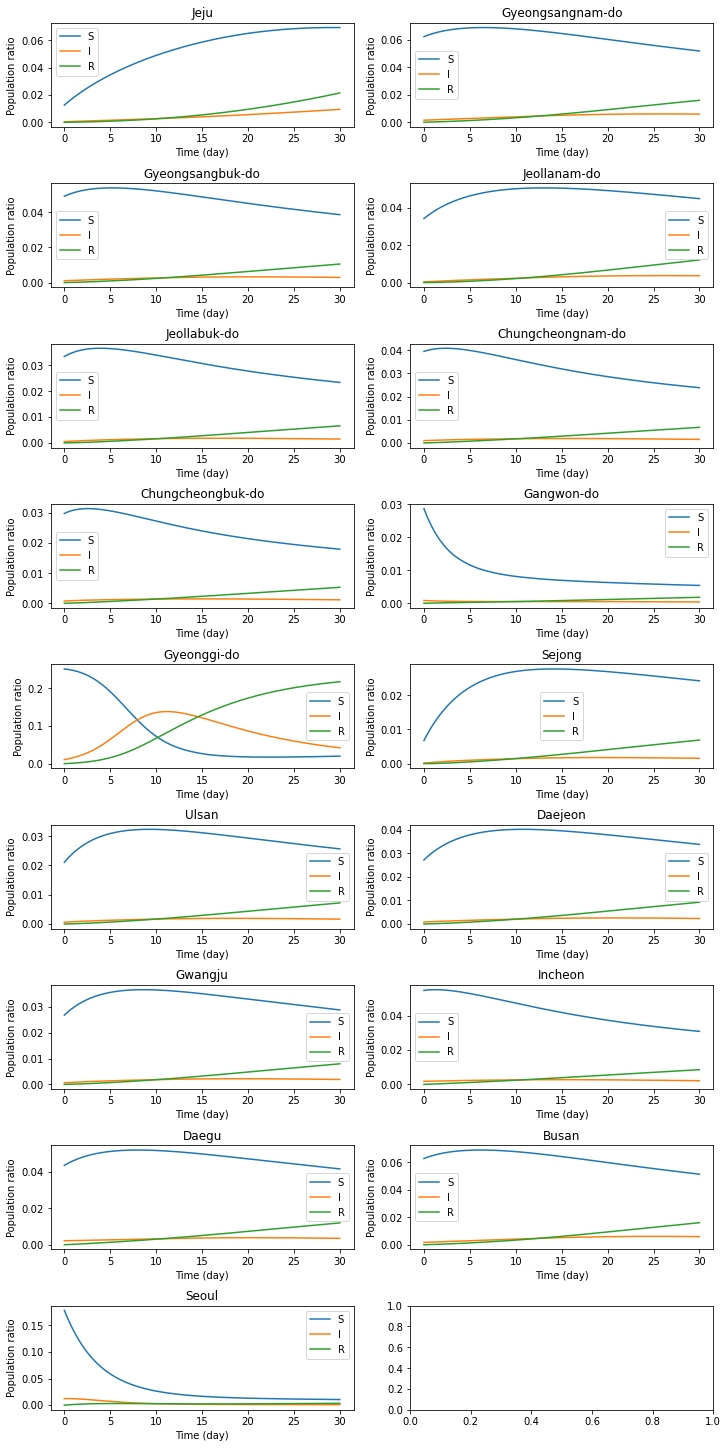

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(10,20), constrained_layout=True)  # Warning!

for sido_name, y_sido, ax in zip(sido_names, sol_reshape, axes.flat):
    ax.plot(t, y_sido[0], label="S")
    ax.plot(t, y_sido[1], label="I")
    ax.plot(t, y_sido[2], label="R")
    ax.legend()
    ax.set(
        title=sido_name,
        xlabel="Time (day)",
        ylabel="Population ratio",
    )

In [ ]:
def draw_graph(name, t, y, ax=None):
    sir_colors = ["tab:red", "tab:cyan", "tab:blue"]
    ax.stackplot(t, y, colors=sir_colors, labels=SIR_LABELS)
    ax.set(
        title=name,
        xlabel="Time (day)",
        ylabel="Population ratio",
    )
    ax.legend()
    return ax

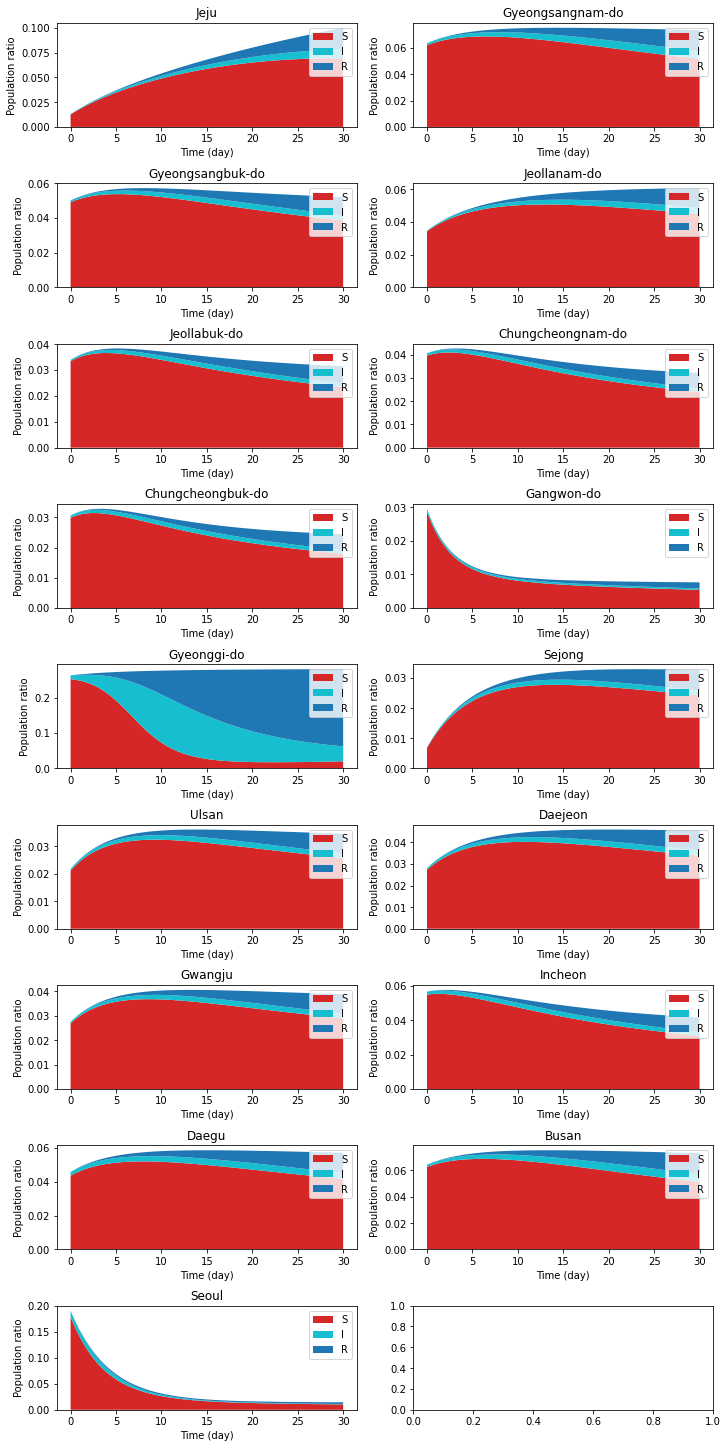

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(10, 20), constrained_layout=True, sharex=False)

for sido_name, y, ax in zip(sido_names, sol_reshape, axes.flat):
    draw_graph(sido_name, t, y, ax=ax)
pass

## 전국 시도별 상황 감안 100일 

In [ ]:
beta_list=[0.028,0.453,0.457,0.417,0.468,0.457,0.460,0.490,0.063,0.463,0.506,0.454,0.524,0.527,0.504,0.436,0.479]
gamma_list=[0.028,0.333,0.236,0.418,0.469,0.499,0.479,0.377,0.045,0.524,0.327,0.451,0.350,0.223,0.311,0.428,0.491]
pop_ratio["beta"]=list(reversed(beta_list))
pop_ratio["gamma"]=list(reversed(gamma_list))

In [ ]:
#매개변수
tspan=(0,30)
beta=np.array(pop_ratio["beta"])
gamma=np.array(pop_ratio["gamma"])

#초기값
sir_init_s=pop_ratio["ratio_26"].tolist() 
sir_init_i=pop_ratio["defCnt_ratio"].tolist()
sir_init_r=[0] * 17
sir_init=(np.column_stack((sir_init_s,sir_init_i,sir_init_r))).flatten()
sir_init=list(map(lambda x: x/sum(sir_init),sir_init))


def sir_sido_beta_gamma(beta,gamma):
    def f(t,x):
        S , I , R =x.reshape(3,17)
        return vector([(-beta * S * I + coef_matrix @ S) , (beta * S * I - gamma * I + coef_matrix @ I) , (gamma * I + coef_matrix @ R)]).flatten()
    return f

sol=solve_ivp(sir_sido_beta_gamma(beta,gamma),tspan,sir_init,dense_output=True)
t=np.linspace(*tspan,500)
y=sol.sol(t)
ss=y[0::3]
ii=y[1::3]
rr=y[2::3]
sol_sido_beta=np.column_stack((ss,ii,rr))
sol_sido_beta=sol_sido_beta.reshape(17,3,-1)

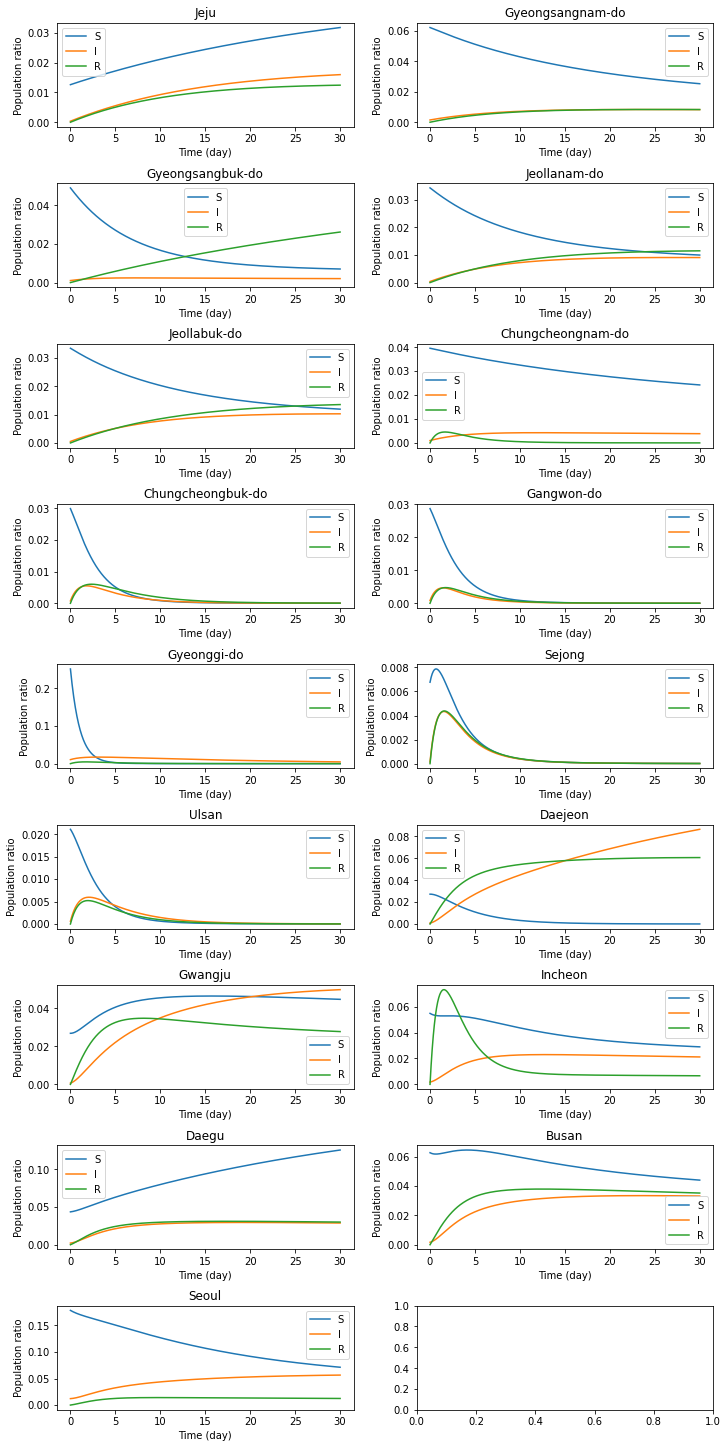

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(10,20), constrained_layout=True)  # Warning!

for sido_name, y_sido, ax in zip(sido_names, sol_sido_beta, axes.flat):
    ax.plot(t, y_sido[0], label="S")
    ax.plot(t, y_sido[1], label="I")
    ax.plot(t, y_sido[2], label="R")
    ax.legend()
    ax.set(
        title=sido_name,
        xlabel="Time (day)",
        ylabel="Population ratio",
    )

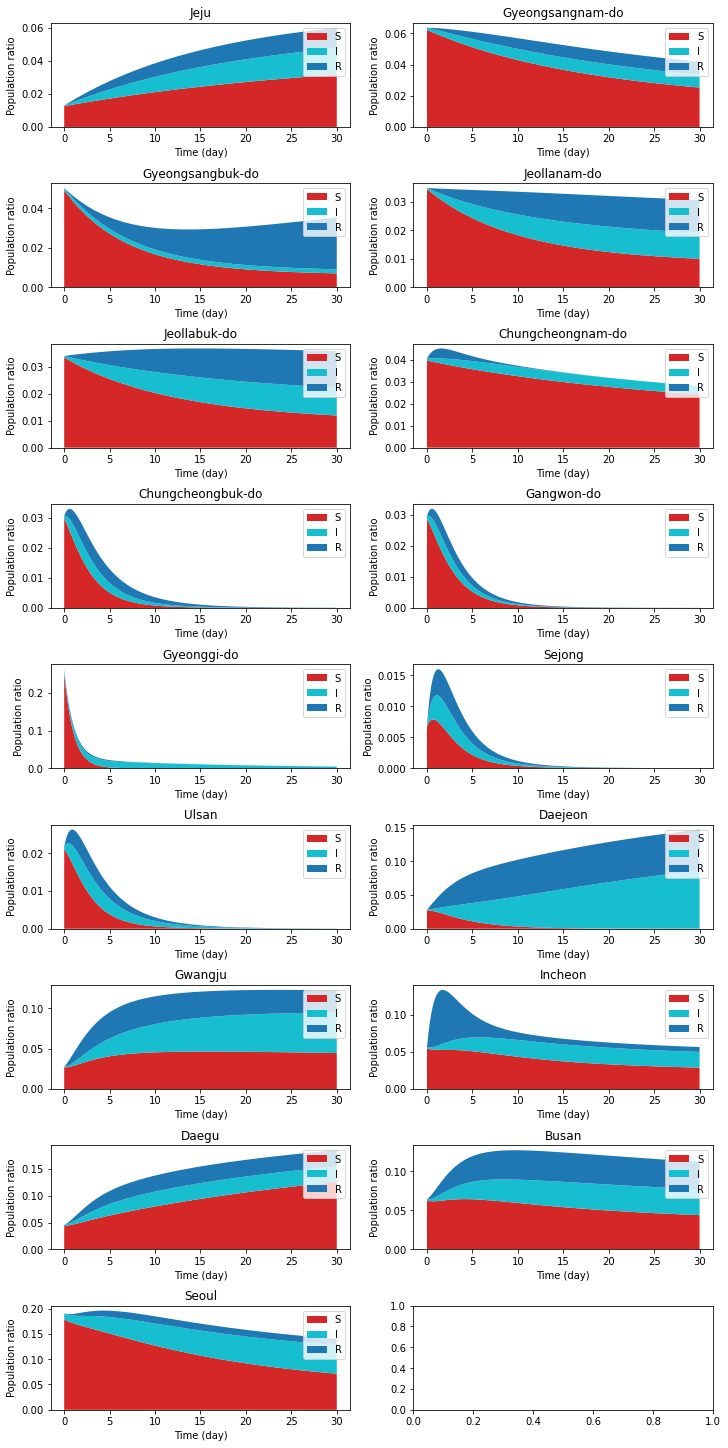

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(10, 20), constrained_layout=True, sharex=False)

for sido_name, y, ax in zip(sido_names, sol_sido_beta, axes.flat):
    draw_graph(sido_name, t, y, ax=ax)
pass

## 시도별 확진자 Peak

In [ ]:
def coef(population,size):
    return size * population

class Sir:
    def __init__(self, population, size, beta=2.3, gamma=0.2):
        self.cf = coef(population, size)
        self.beta = beta
        self.gamma = gamma

    def __call__(self, t, y):
        y = y.reshape((-1, N_SIR_COMPARTMENT))
        S, I, R = y.T  # S, I, and R: 1D, length (시도수)

        s_to_i = self.beta * S * I
        i_to_r = self.gamma * I

        dsdt = -s_to_i
        didt = s_to_i - i_to_r
        drdt = i_to_r

        res = (np.column_stack((dsdt, didt, drdt)) + self.cf @ y).flatten()

        return res

Jeju의 확진자 최대치는 35809명 이며, 최대가 되는 유동인구 파라미터는 18.22입니다.
Gyeongsangnam-do의 확진자 최대치는 55670명 이며, 최대가 되는 유동인구 파라미터는 85.69입니다.
Gyeongsangbuk-do의 확진자 최대치는 30651명 이며, 최대가 되는 유동인구 파라미터는 81.61입니다.
Jeollanam-do의 확진자 최대치는 26919명 이며, 최대가 되는 유동인구 파라미터는 84.34입니다.
Jeollabuk-do의 확진자 최대치는 12877명 이며, 최대가 되는 유동인구 파라미터는 69.84입니다.
Chungcheongnam-do의 확진자 최대치는 15461명 이며, 최대가 되는 유동인구 파라미터는 69.84입니다.
Chungcheongbuk-do의 확진자 최대치는 9047명 이며, 최대가 되는 유동인구 파라미터는 64.75입니다.
Gangwon-do의 확진자 최대치는 2828명 이며, 최대가 되는 유동인구 파라미터는 57.98입니다.
Gyeonggi-do의 확진자 최대치는 1872219명 이며, 최대가 되는 유동인구 파라미터는 1.37입니다.
Sejong의 확진자 최대치는 2791명 이며, 최대가 되는 유동인구 파라미터는 72.26입니다.
Ulsan의 확진자 최대치는 9026명 이며, 최대가 되는 유동인구 파라미터는 72.26입니다.
Daejeon의 확진자 최대치는 15424명 이며, 최대가 되는 유동인구 파라미터는 80.25입니다.
Gwangju의 확진자 최대치는 12858명 이며, 최대가 되는 유동인구 파라미터는 75.24입니다.
Incheon의 확진자 최대치는 26980명 이며, 최대가 되는 유동인구 파라미터는 75.24입니다.
Daegu의 확진자 최대치는 30635명 이며, 최대가 되는 유동인구 파라미터는 84.34입니다.
Busan의 확진자 최대치는 55670명 이며, 최대가 되는 유동인구 파라미터는 85.69입니다.
Seoul의 확진자 최대치는 736998명 이며, 최대가 되는 유동인구 파라미터는 

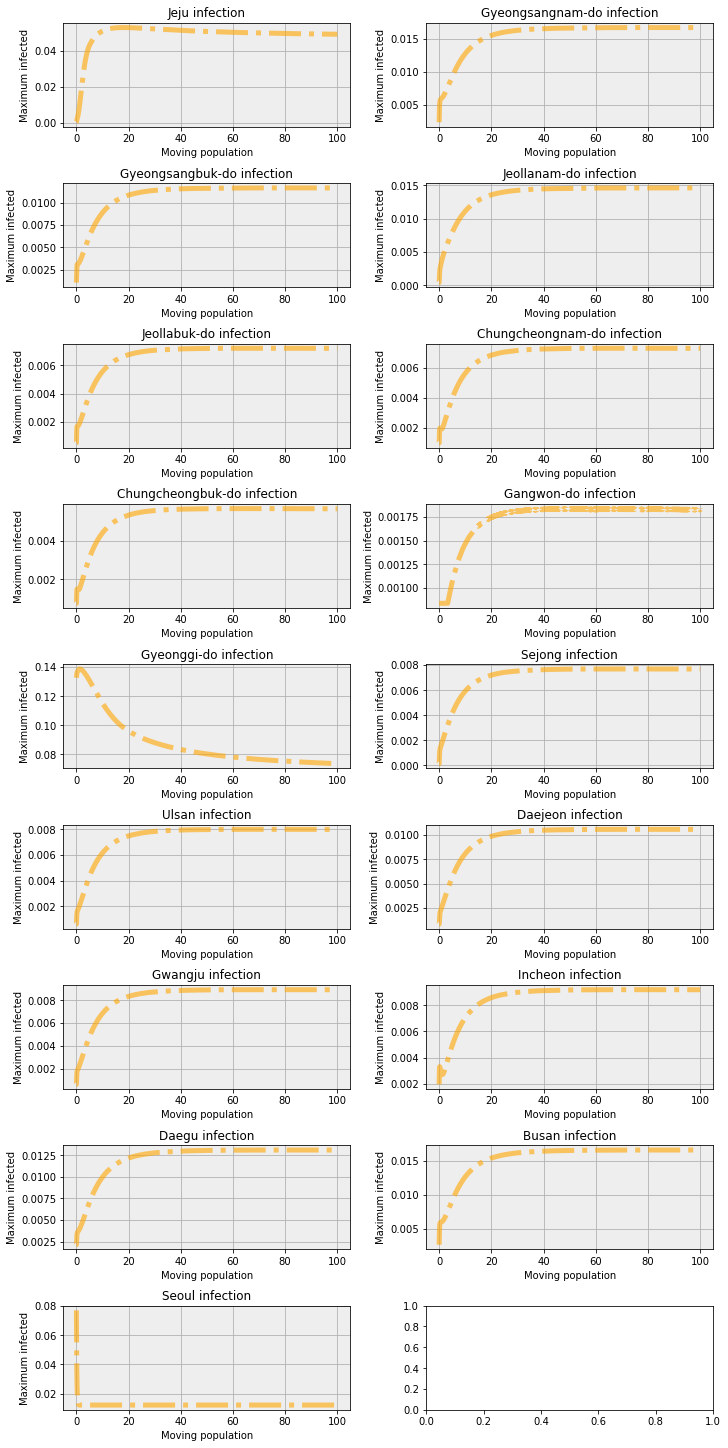

In [ ]:
sido_names = list(pop_ratio["gubunEn"])
population = np.array([pop_ratio["pop"]*10000])

beta = 2.0
gamma = 0.1

n_sido = len(sido_names)
t_span = [0, 25]
t = np.linspace(*t_span, 200)

size_list = np.linspace(0,100,10000)

max_infected = []  
for size in size_list:
    sir_model = Sir(coef_matrix, size, beta, gamma)
    sol = solve_ivp(sir_model, t_span, sir_init, dense_output=True)
    y = sol.sol(t)

    max_infected.append(y[1::N_SIR_COMPARTMENT].max(axis=-1))

max_infected = np.array(max_infected)

i_list=np.arange(17)
fig, axes = plt.subplots(9, 2, figsize=(10, 20), constrained_layout=True, sharex=False)

for i ,sido_name ,ax in zip(i_list,sido_names,axes.flat):
    ax.plot(
        size_list,
        max_infected[:, i],
        alpha=0.6,
        linestyle="-.",
        markerfacecolor="r",
        color="orange",
        markeredgecolor="tab:green",
        linewidth=5
    )
    ax.set(
        title=f"{sido_name} infection",
        xlabel="Moving population",
        ylabel="Maximum infected",
        facecolor="#eeeeee",
    )

    ax.grid()
    max_infected_sido=round(max(max_infected[:,i]) * list(pop_ratio["pop"] * 10000)[i])
    max_infected_sido_coef=np.argmax(max_infected[:,i])/100
    print(f"{sido_name}의 확진자 최대치는 {max_infected_sido}명 이며, 최대가 되는 유동인구 파라미터는 {max_infected_sido_coef}입니다.")